# Lab 05 : Train with mini-batches -- demo

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5242_2025_codes/codes/labs_lecture03/lab05_minibatch_training'
    print(path_to_file)
    # change current path to the folder containing "file_name"
    os.chdir(path_to_file)
    !pwd

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

# Warm up

### Make a random matrix with 5 rows 

In [26]:
A=torch.rand(5,3)
print(A)

tensor([[0.0376, 0.1313, 0.8126],
        [0.5762, 0.6230, 0.7934],
        [0.4003, 0.4345, 0.2222],
        [0.0280, 0.2765, 0.5139],
        [0.5643, 0.9881, 0.2735]])


### Choose at random two indices in {0,1,2,3,4}

In [16]:
indices=torch.LongTensor(2).random_(0,5) # generate an integer randomly from 0 to 5-1.
# use 2 to indicate that the Tensor would have size 2
print(indices)

tensor([1, 1])


### Extract the corresponding rows of the matrix

In [5]:
minibatch=A[indices]
print(minibatch)

tensor([[0.8928, 0.8430, 0.6883],
        [0.8928, 0.8430, 0.6883]])


# Demo

### Download the data and print the sizes

In [6]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

In [7]:
train_data=torch.load(data_path+'mnist/train_data.pt')

print(train_data.size())

torch.Size([60000, 28, 28])


In [8]:
train_label=torch.load(data_path+'mnist/train_label.pt')

print(train_label.size())

torch.Size([60000])


In [9]:
test_data=torch.load(data_path+'mnist/test_data.pt')

print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [10]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        y = self.linear_layer(x)
        prob = torch.softmax(y, dim=1)
        return prob

### Build the net

In [11]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the size of the mini-batches 

In [12]:
bs=200

### Take the 6th image of the test set:

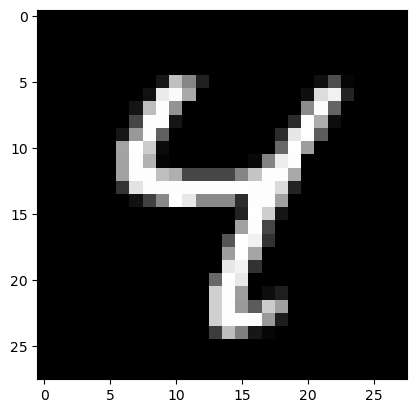

In [13]:
im=test_data[6]
utils.show(im)

### Feed it to the UNTRAINED network and print the confidence scores

In [14]:
prob =  net( im.view(1,784)) 
print(prob)

tensor([[0.0948, 0.1540, 0.1186, 0.0889, 0.0960, 0.0767, 0.1008, 0.0997, 0.0775,
         0.0931]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

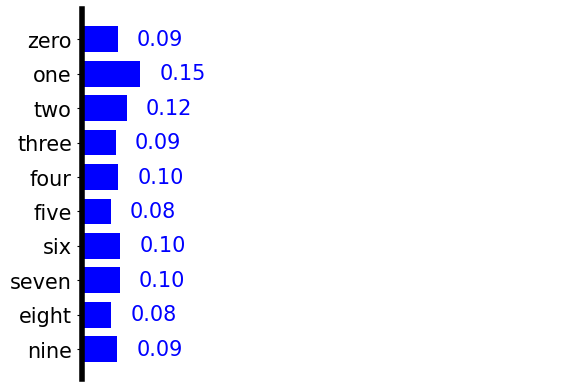

In [15]:
utils.show_prob_mnist(prob)

### Train the network (only 5000 iterations) on the train set

In [ ]:
# without mini batch 
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # choose a random integer between 0 and 59,999 
    # extract the corresponding picture and label
    # and reshape them to fit the network
    idx=randint(0, 60000-1)
    input=train_data[idx].view(1,784)
    label=train_label[idx].view(1)


    # feed the input to the net  
    input.requires_grad_() # input.requires_grad_(): Enables automatic differentiation for input, so PyTorch can compute gradients if needed.
    prob=net(input) 
 
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob) # Since nn.NLLLoss() expects log-probabilities, we apply torch.log() on prob.
    loss = criterion(log_prob, label) # Clears previous gradients to prevent accumulation from previous iterations.  
    optimizer.zero_grad() # Computes gradients of the loss with respect to the network’s parameters 
    loss.backward() # Computes gradients of the loss with respect to the network’s parameters.
    optimizer.step() #Updates weights and biases using the computed gradients.

In [20]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # create a minibatch (NEW) 
    indices=torch.LongTensor(bs).random_(0,60000) # create a tensor of size bs, with random indexes
    minibatch_data =  train_data[indices]
    minibatch_label= train_label[indices]
    
    #reshape them to fit the network (NEW)
    inputs=minibatch_data.view(bs,784)
    # no need to reshape the minibatch_label

    # no change from here onwards

    # feed the input to the net  
    inputs.requires_grad_()
    prob=net(inputs) 
    
    
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, minibatch_label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()
    

tensor([9, 2, 4, 2, 1, 2, 7, 7, 7, 5, 6, 2, 5, 4, 0, 9, 9, 4, 5, 0, 7, 3, 3, 3,
        6, 2, 4, 9, 4, 5, 3, 2, 7, 6, 6, 6, 6, 1, 6, 6, 5, 1, 2, 5, 7, 5, 0, 9,
        0, 6, 5, 4, 5, 7, 7, 2, 8, 4, 3, 7, 0, 6, 0, 3, 9, 2, 3, 6, 2, 4, 7, 9,
        3, 3, 5, 0, 0, 1, 2, 1, 2, 4, 4, 8, 0, 2, 3, 0, 7, 3, 1, 7, 1, 2, 1, 5,
        8, 3, 2, 2, 1, 9, 2, 6, 2, 0, 0, 9, 9, 3, 7, 3, 4, 3, 8, 8, 3, 4, 5, 3,
        5, 6, 7, 5, 4, 5, 2, 0, 4, 3, 6, 7, 2, 2, 2, 7, 9, 2, 9, 4, 7, 2, 9, 1,
        4, 4, 5, 1, 2, 2, 0, 2, 3, 4, 1, 6, 4, 8, 0, 7, 8, 3, 5, 7, 4, 9, 8, 2,
        6, 0, 9, 7, 8, 8, 0, 6, 8, 2, 2, 1, 7, 3, 0, 7, 5, 7, 0, 4, 3, 2, 6, 0,
        8, 0, 2, 7, 0, 6, 9, 4])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


### Take the 6th image of the test set:

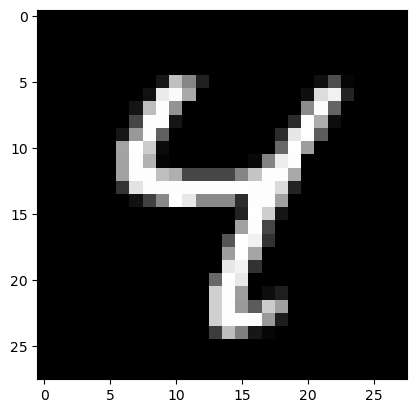

In [21]:
im=test_data[6]
utils.show(im)

### Feed it to the TRAINED net:

In [22]:
prob =  net( im.view(1,784)) 
print(prob)

tensor([[1.5135e-05, 1.2618e-05, 9.5808e-06, 1.0369e-03, 9.3685e-01, 1.1801e-02,
         2.0424e-04, 2.3585e-03, 3.1887e-02, 1.5825e-02]],
       grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

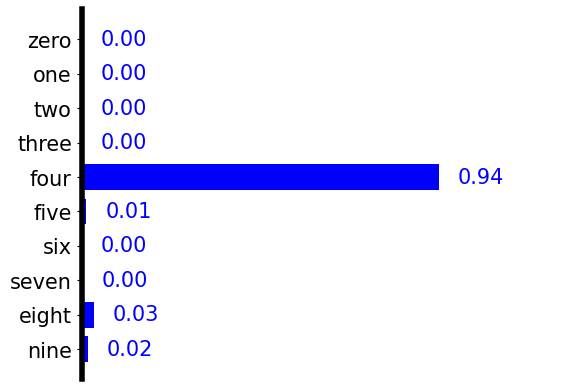

In [23]:
utils.show_prob_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

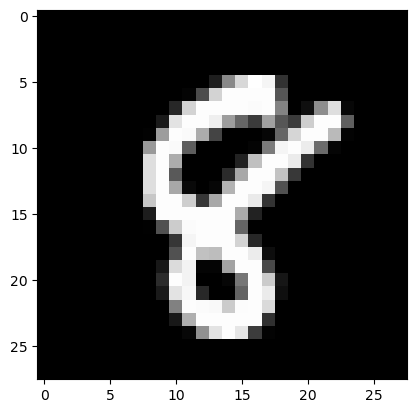

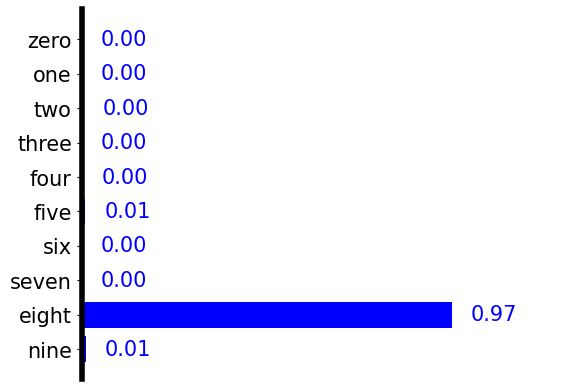

In [24]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_mnist(prob)